In [44]:
%matplotlib inline

In [202]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from skimage import io, filters, color
from scipy.ndimage.interpolation import rotate 

In [9]:
!pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

  Cloning git://github.com/Theano/Theano.git to /var/folders/wr/9mj3z8xj5l1_t0kjzf44x56c0000gn/T/pip-j00576ze-build
  Running setup.py install for Theano ... - \ | / - \ | / - \ | / - \ | / - done
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
!pip install keras

    100% |████████████████████████████████| 174kB 710kB/s 
  Running setup.py bdist_wheel for keras ... - \ done
  Stored in directory: /Users/lina/Library/Caches/pip/wheels/f8/2c/8e/27d952128220b1acf6fcd5e692269c6e8d60744c15fd160c2c
Successfully built keras
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
!KERAS_BACKEND=theano python -c "from keras import backend"

Using Theano backend.


In [4]:
import keras

Using Theano backend.


In [105]:
img = io.imread('/Users/lina/Documents/LungMAP/E16.5/blood_vessels/2015-04-029_20X_C57Bl6_E16.5_LMM.14.24.4.46_SOX9_SFTPC_ACTA2_0011322,627.tif')

## Augment image training set by rotation

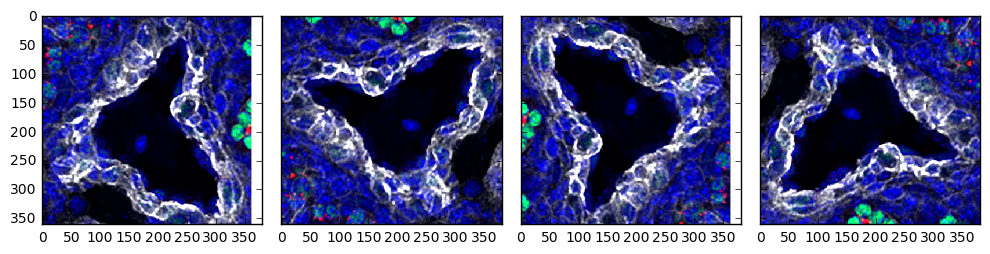

In [186]:
img90 = rotate(img, 90)
img180 = rotate(img, 180)
img270 = rotate(img, 270)

fig, axes = plt.subplots(1, 4, figsize=(10,5), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
axes[0].imshow(img, interpolation='nearest', cmap='gray')
axes[1].imshow(img90, interpolation='nearest', cmap='gray')
axes[2].imshow(img180, interpolation='nearest', cmap='gray')
axes[3].imshow(img270, interpolation='nearest', cmap='gray')

plt.tight_layout()

## Augment image training set with keras

#### Reference:
[Building powerful image classification models using very little data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)

In [200]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/Users/lina/Documents/LungMAP/E16.5/blood_vessels/2015-04-029_20X_C57Bl6_E16.5_LMM.14.24.4.46_SOX9_SFTPC_ACTA2_0011322,627.tif')
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)

# the .flow() command below generates batches of randomly transformed images and saves the results
i = 0
for batch_test in datagen.flow(x, batch_size=1,
                          save_to_dir='/Users/lina/Documents/LungMAP/E16.5/blood_vessels_augment', save_prefix='blood_vessel', save_format='tif'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [213]:
ims=[]
for im in glob.glob("/Users/lina/Documents/LungMAP/E16.5/blood_vessels_augment/*.tif"):
    ims.append(io.imread(im))

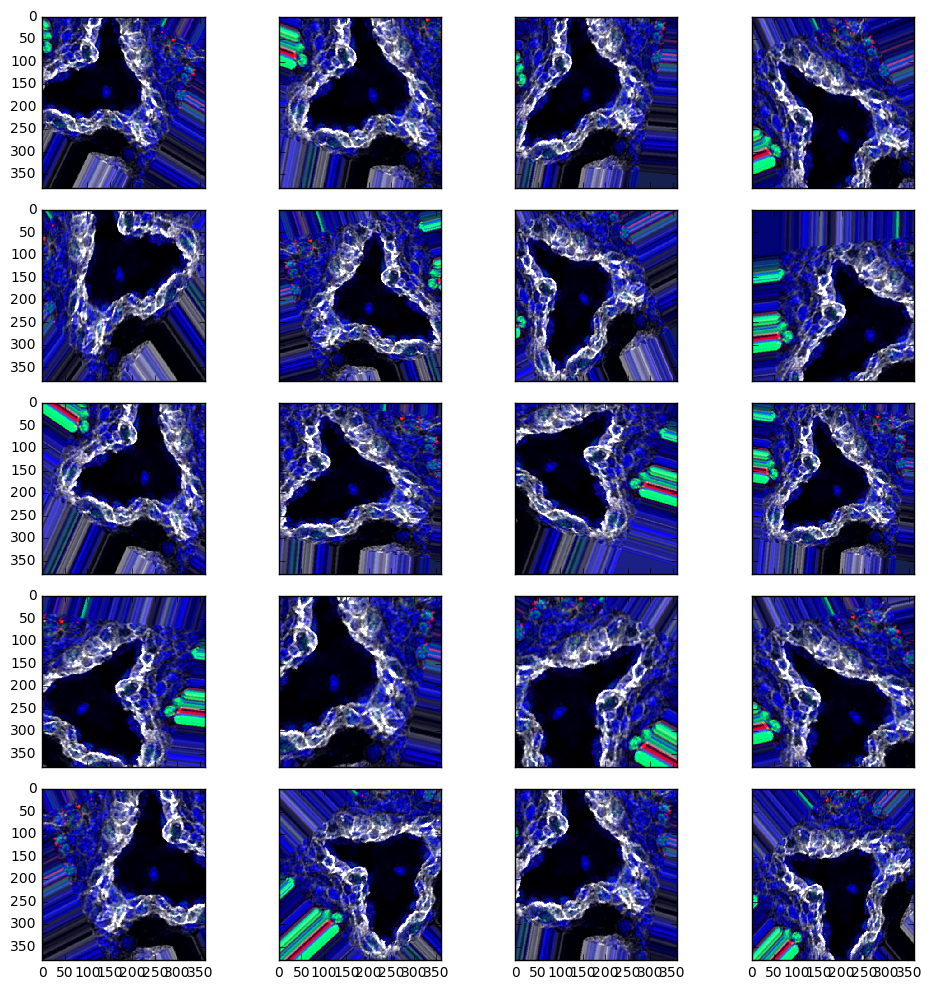

In [250]:
fig, axes = plt.subplots(5, 4, figsize=(10,10), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})
idx=0
for i in range(0,5):
    for j in range(0,4):
        axes[i,j].imshow(ims[idx], interpolation='nearest', cmap='gray')
        idx += 1
plt.tight_layout()